[*********************100%***********************]  3 of 3 completed
c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill')


Data Loaded
Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64
Summary Statistics:
 Ticker          BND          SPY         TSLA
count   2474.000000  2474.000000  2474.000000
mean      70.089252   310.253152   111.438965
std        4.889918   111.250657   110.120450
min       62.637589   157.328598     9.578000
25%       66.314114   214.822334    17.066167
50%       68.888950   275.812302    25.043000
75%       73.807495   402.297523   216.865002
max       79.812935   584.590027   409.970001


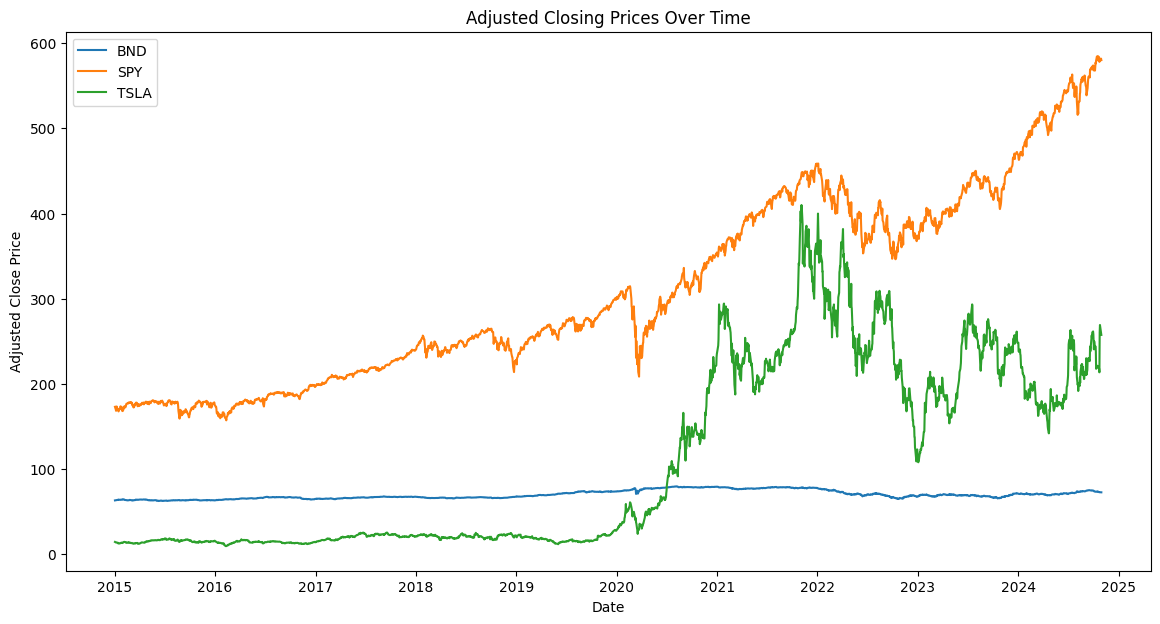

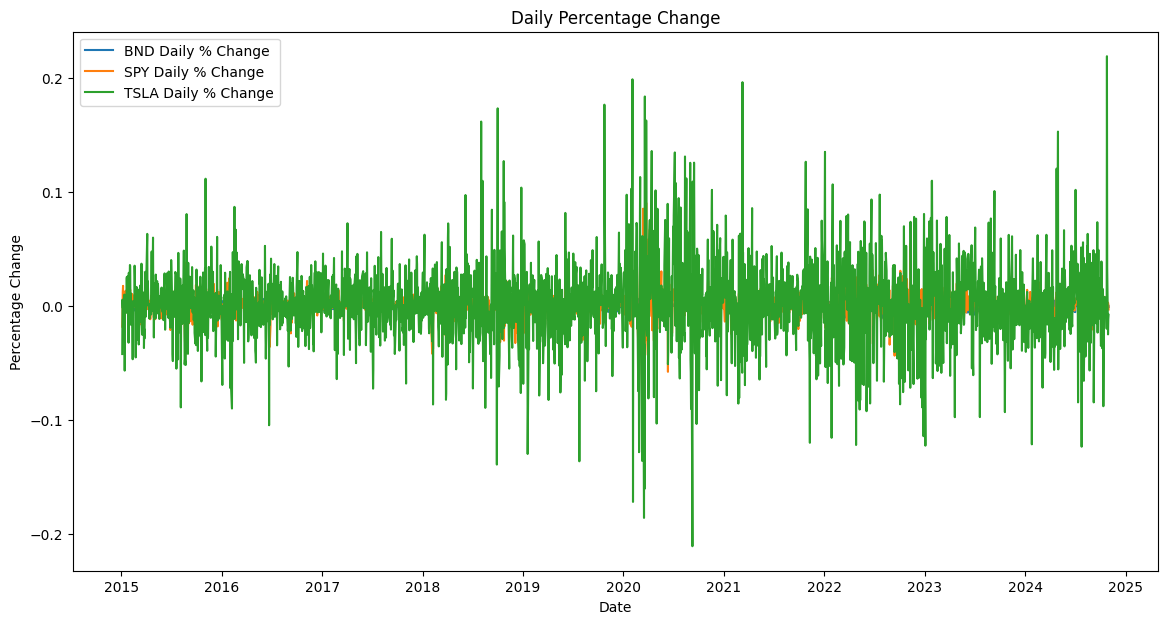

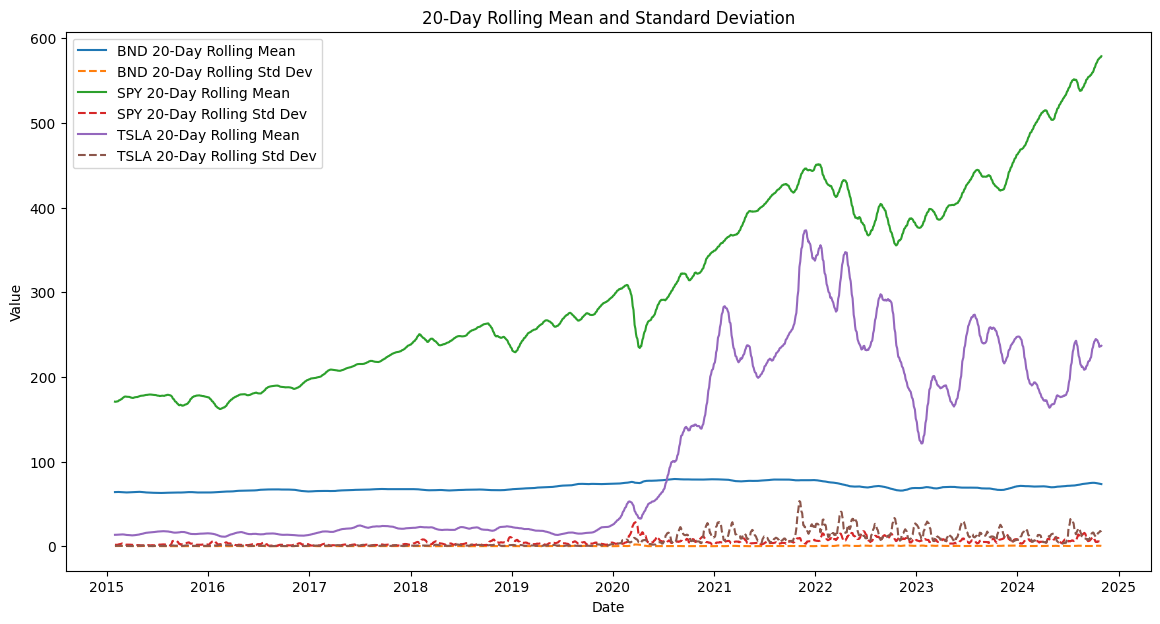

Outliers:
       BND  SPY     TSLA
0     NaN  NaN      NaN
1     NaN  NaN      NaN
2     NaN  NaN      NaN
3     NaN  NaN      NaN
4     NaN  NaN      NaN
...   ...  ...      ...
2468  NaN  NaN  0.21919
2469  NaN  NaN      NaN
2470  NaN  NaN      NaN
2471  NaN  NaN      NaN
2472  NaN  NaN      NaN

[2473 rows x 3 columns]


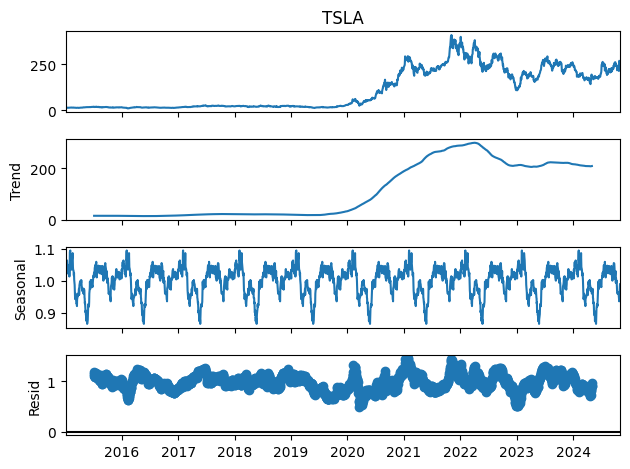

Value at Risk (5% confidence):
 Ticker
BND    -0.004798
SPY    -0.016764
TSLA   -0.051257
Name: 0.05, dtype: float64
Sharpe Ratio:
 Ticker
BND    -0.004994
SPY     0.042373
TSLA    0.048033
dtype: float64


In [7]:
# Import the module
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))
from financial_analysis import *

# Define parameters
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

# Step 1: Load data
data = load_data(tickers, start_date, end_date)
print("Data Loaded")

# Step 2: Clean data and check for missing values
cleaned_data, missing_values = clean_data(data)
print("Missing Values:\n", missing_values)

# Step 3: Data Summary
summary_stats = data_summary(cleaned_data)
print("Summary Statistics:\n", summary_stats)

# Step 4: Normalize Data (for ML Models if needed)
normalized_data = normalize_data(cleaned_data)

# Step 5: Plot Closing Prices Over Time
plot_closing_prices(cleaned_data)

# Step 6: Calculate and Plot Daily Percentage Change
pct_change = plot_daily_percentage_change(cleaned_data)

# Step 7: Rolling Mean and Standard Deviation (Volatility Analysis)
plot_rolling_stats(cleaned_data, window=20)

# Step 8: Outlier Detection
outliers = detect_outliers(pct_change)
print("Outliers:\n", outliers)

# Step 9: Decompose Time Series for TSLA (example)
decomposition = decompose_time_series(cleaned_data, 'TSLA')

# Step 10: Calculate Value at Risk (VaR) and Sharpe Ratio
var_95, sharpe_ratio = calculate_risk_metrics(cleaned_data)
print("Value at Risk (5% confidence):\n", var_95)
print("Sharpe Ratio:\n", sharpe_ratio)


In [3]:
import yfinance as yf
import pandas as pd

# Step 1: Load the data
tickers = ["TSLA", "BND", "SPY"]
data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Adj Close']

# Step 2: Data cleaning and handling missing values
# Filling missing values
data = data.interpolate(method='linear').fillna(method='bfill')

# Step 3: Save the cleaned data to a CSV file
data.to_csv('../data/cleaned_financial_data.csv', index=True)  # index=True to include date as the first column

print("Data saved as cleaned_financial_data.csv")


[*********************100%***********************]  3 of 3 completed

Data saved as cleaned_financial_data.csv



C:\Users\Naim\AppData\Local\Temp\ipykernel_16784\1069630514.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate(method='linear').fillna(method='bfill')


In [6]:
data = pd.read_csv('../data/cleaned_financial_data.csv')
data.shape

(3272, 4)